In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
cdc_df = pd.read_sas('LLCP2021.XPT')

C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdc_df = pd.read_sas('LLCP2021.XPT')
C:\Users\sara_\AppData\Local\Temp\ipykernel_6780\4154428693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

In [19]:
cdc_df.shape

(438693, 303)

In [20]:
print([x for x in cdc_df.columns if 'HLTH' in x]) 

#for sleep
print([x for x in cdc_df.columns if 'SLE' in x])
print([x for x in cdc_df.columns if 'TIM' in x])

['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', '_RFHLTH', '_HLTHPLN']
[]
['SAFETIME', 'PSATIME1']




---



---



In [21]:
heart_df=cdc_df.copy()


In [7]:
cols=['BIRTHSEX', 'CELLSEX', 'COLGSEX', 'LANDSEX',
      'GENHLTH', 'PHYSHLTH','MENTHLTH','_HLTHPLN',
      'CHECKUP1','EXERANY2', 'ADDEPEV3',
      'DIABETE4', 'MARITAL','EDUCA',
      'ASTHMA3','ASTHNOW','EMPLOY1'
      'WEIGHT2','DECIDE', 'SMOKDAY2','LCSFIRST',
      'DRNK3GE5',
      'CVDINFR4','CVDCRHD4', 'CVDSTRK3']

In [23]:

heart_df.rename(columns={ 'BIRTHSEX':'BIRTH_SEX', 'CELLSEX':'CEl_SEX', 'COLGSEX':'COL_SEX', 'LANDSEX':'LAN_SEX',
                         'GENHLTH':'GENERAL_HEALTH', 'PHYSHLTH':'PHYSICAL_HEALTH_30',
                         'MENTHLTH':'MENTAL_HEALTH_30','_HLTHPLN':'HEALTH_PLAN',
                         'CHECKUP1':'ROUTIN_CHECKUP',
                          'EXERANY2':'EXERCISE_30', 'ADDEPEV3':'DEPRESSION',
                          'DIABETE4':'DIABETES', 'MARITAL':'MARITAL_STATUS','EDUCA':'EDUCATION',
                          'ASTHMA3':'LAST_ASTHMA','ASTHNOW':'CURRENT_ASTHMA','EMPLOY1':'WORK_STATUS',
                          'WEIGHT2':'WEIGHT','HEIGHT3':'HEIGHT', 'DECIDE':'CONCENTRATION_DIFF', 
                          'SMOKDAY2':'SMOKE_CIGARETT_NOW','LCSFIRST':'SMOKE_CIGARETT_AGE',
                          'DRNK3GE5':'DRINKING_30',
                          'CVDINFR4':'PREV_HEART_ATTACK','CVDCRHD4':'HEART_DISEASE', 'CVDSTRK3':'HEART_STROKE_TARGET'}, inplace=True)


In [24]:
heart_df=heart_df[['CEl_SEX','COL_SEX', 'LAN_SEX','BIRTH_SEX','GENERAL_HEALTH','PHYSICAL_HEALTH_30','MENTAL_HEALTH_30',
                   'HEALTH_PLAN','ROUTIN_CHECKUP',
               'EXERCISE_30','DEPRESSION',
               'DIABETES', 'MARITAL_STATUS','EDUCATION',
               'PREV_HEART_ATTACK','HEART_DISEASE','HEART_STROKE_TARGET',
               'LAST_ASTHMA','CURRENT_ASTHMA','WORK_STATUS',
               'WEIGHT','HEIGHT', 'CONCENTRATION_DIFF','SMOKE_CIGARETT_NOW','SMOKE_CIGARETT_AGE',
               'DRINKING_30']]

In [25]:
heart_df.shape

(438693, 26)

In [26]:
for x in heart_df.columns:
  print(f'----{x}----')
  print(heart_df[x].value_counts())
  print(f'Null values: {heart_df[x].isnull().sum()}')
  print('')  

----CEl_SEX----
2.0    160785
1.0    159964
9.0        83
7.0        73
Name: CEl_SEX, dtype: int64
Null values: 117788

----COL_SEX----
2.0    19
1.0    11
Name: COL_SEX, dtype: int64
Null values: 438663

----LAN_SEX----
2.0    34411
1.0    15418
9.0        9
7.0        8
Name: LAN_SEX, dtype: int64
Null values: 388847

----BIRTH_SEX----
2.0    52392
1.0    45789
9.0      243
7.0       78
Name: BIRTH_SEX, dtype: int64
Null values: 340191

----GENERAL_HEALTH----
2.0    149112
3.0    137938
1.0     77741
4.0     54736
5.0     18005
7.0       788
9.0       369
Name: GENERAL_HEALTH, dtype: int64
Null values: 4

----PHYSICAL_HEALTH_30----
88.0    287796
30.0     29732
2.0      22220
1.0      17063
3.0      12868
5.0      11642
10.0      8595
77.0      7898
15.0      7623
4.0       6821
7.0       6695
20.0      4670
14.0      3994
6.0       1901
25.0      1866
99.0      1593
8.0       1254
21.0       927
12.0       813
28.0       671
9.0        302
29.0       279
18.0       253
16.0       2



---
## Fill the null values in the sex column



In [27]:
round(heart_df.isnull().sum()/heart_df.shape[0]*100,2).sort_values(ascending=False)

COL_SEX                99.99
SMOKE_CIGARETT_AGE     97.14
LAN_SEX                88.64
CURRENT_ASTHMA         85.98
BIRTH_SEX              77.55
SMOKE_CIGARETT_NOW     61.83
DRINKING_30            52.17
CEl_SEX                26.85
CONCENTRATION_DIFF      3.84
HEIGHT                  2.95
WEIGHT                  2.69
WORK_STATUS             0.82
ROUTIN_CHECKUP          0.00
EXERCISE_30             0.00
GENERAL_HEALTH          0.00
PHYSICAL_HEALTH_30      0.00
MENTAL_HEALTH_30        0.00
LAST_ASTHMA             0.00
HEART_STROKE_TARGET     0.00
HEART_DISEASE           0.00
PREV_HEART_ATTACK       0.00
HEALTH_PLAN             0.00
MARITAL_STATUS          0.00
DIABETES                0.00
DEPRESSION              0.00
EDUCATION               0.00
dtype: float64

In [12]:
heart_df['CEl_SEX'].isnull().sum()

117788

In [13]:
heart_df['BIRTH_SEX'].isnull().sum()

340191

In [14]:
heart_df['LAN_SEX'].isnull().sum()

388847

In [15]:
heart_df['COL_SEX'].isnull().sum()

438663

In [28]:
all_null=heart_df[heart_df['CEl_SEX'].isnull() & heart_df['LAN_SEX'].isnull() & 
         heart_df['COL_SEX'].isnull() & heart_df['BIRTH_SEX'].isnull()].shape
round(all_null[0]/heart_df.shape[0]*100,2)

12.35

In [29]:
heart_df['SEX']=heart_df['CEl_SEX']

heart_df['SEX'].fillna(heart_df['LAN_SEX'],inplace=True)
heart_df['SEX'].fillna(heart_df['BIRTH_SEX'],inplace=True)
heart_df['SEX'].fillna(heart_df['COL_SEX'],inplace=True)

In [34]:
#total missing sex vals
print(heart_df['SEX'].isnull().sum())
num=round(heart_df['SEX'].isnull().sum()/heart_df.shape[0]*100,2)
print(f'{num}%')

54176
12.35%


In [35]:
heart_df.drop(columns=['CEl_SEX','COL_SEX', 'LAN_SEX','BIRTH_SEX'],inplace=True)

In [36]:
heart_df.columns

Index(['GENERAL_HEALTH', 'PHYSICAL_HEALTH_30', 'MENTAL_HEALTH_30',
       'HEALTH_PLAN', 'ROUTIN_CHECKUP', 'EXERCISE_30', 'DEPRESSION',
       'DIABETES', 'MARITAL_STATUS', 'EDUCATION', 'PREV_HEART_ATTACK',
       'HEART_DISEASE', 'HEART_STROKE_TARGET', 'LAST_ASTHMA', 'CURRENT_ASTHMA',
       'WORK_STATUS', 'WEIGHT', 'HEIGHT', 'CONCENTRATION_DIFF',
       'SMOKE_CIGARETT_NOW', 'SMOKE_CIGARETT_AGE', 'DRINKING_30', 'SEX'],
      dtype='object')

In [37]:
heart_df.shape[0]

438693



---
## Number of null Values



In [38]:
round(heart_df.isnull().sum()/heart_df.shape[0]*100,2).sort_values(ascending=False)

SMOKE_CIGARETT_AGE     97.14
CURRENT_ASTHMA         85.98
SMOKE_CIGARETT_NOW     61.83
DRINKING_30            52.17
SEX                    12.35
CONCENTRATION_DIFF      3.84
HEIGHT                  2.95
WEIGHT                  2.69
WORK_STATUS             0.82
HEART_STROKE_TARGET     0.00
LAST_ASTHMA             0.00
GENERAL_HEALTH          0.00
PHYSICAL_HEALTH_30      0.00
PREV_HEART_ATTACK       0.00
EDUCATION               0.00
MARITAL_STATUS          0.00
DIABETES                0.00
DEPRESSION              0.00
EXERCISE_30             0.00
ROUTIN_CHECKUP          0.00
HEALTH_PLAN             0.00
MENTAL_HEALTH_30        0.00
HEART_DISEASE           0.00
dtype: float64

PREV_HEART_ATTACK     0.25
HEART_DISEASE         0.19
LAST_ASTHMA           0.19
DEPRESSION            0.15
DIABETES              0.14
CONCENTRATION_DIFF    0.08
HEIGHT                0.06
ROUTIN_CHECKUP        0.06
HEALTH_PLAN           0.04
WEIGHT                0.04
EDUCATION             0.04
MARITAL_STATUS        0.03
EXERCISE_30           0.03
PHYSICAL_HEALTH_30    0.03
CURRENT_ASTHMA        0.02
SMOKE_CIGARETT_AGE    0.00
SMOKE_CIGARETT_NOW    0.00
SEX                  -0.00
MENTAL_HEALTH_30      0.00
DRINKING_30          -0.02
WORK_STATUS          -0.05
GENERAL_HEALTH       -0.05
dtype: float64


<Axes: >

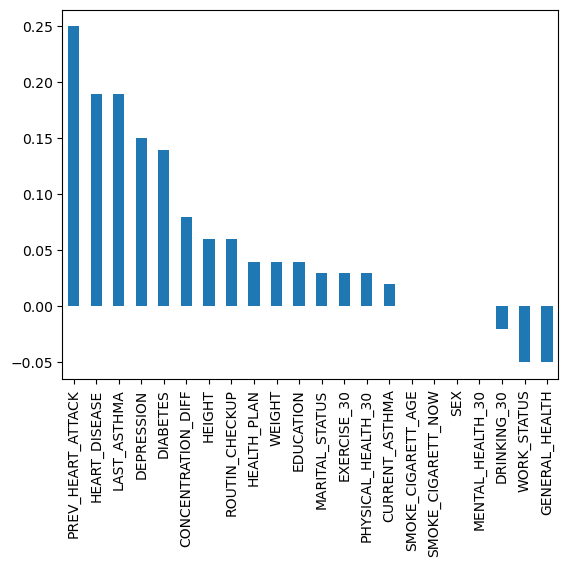

In [39]:
#Corr with HEART_STROKE
print(round(heart_df.corrwith(heart_df['HEART_STROKE_TARGET']),2).sort_values(ascending=False).drop('HEART_STROKE_TARGET'))
round(heart_df.corrwith(heart_df['HEART_STROKE_TARGET']),2).sort_values(ascending=False).drop('HEART_STROKE_TARGET').plot(kind='bar')

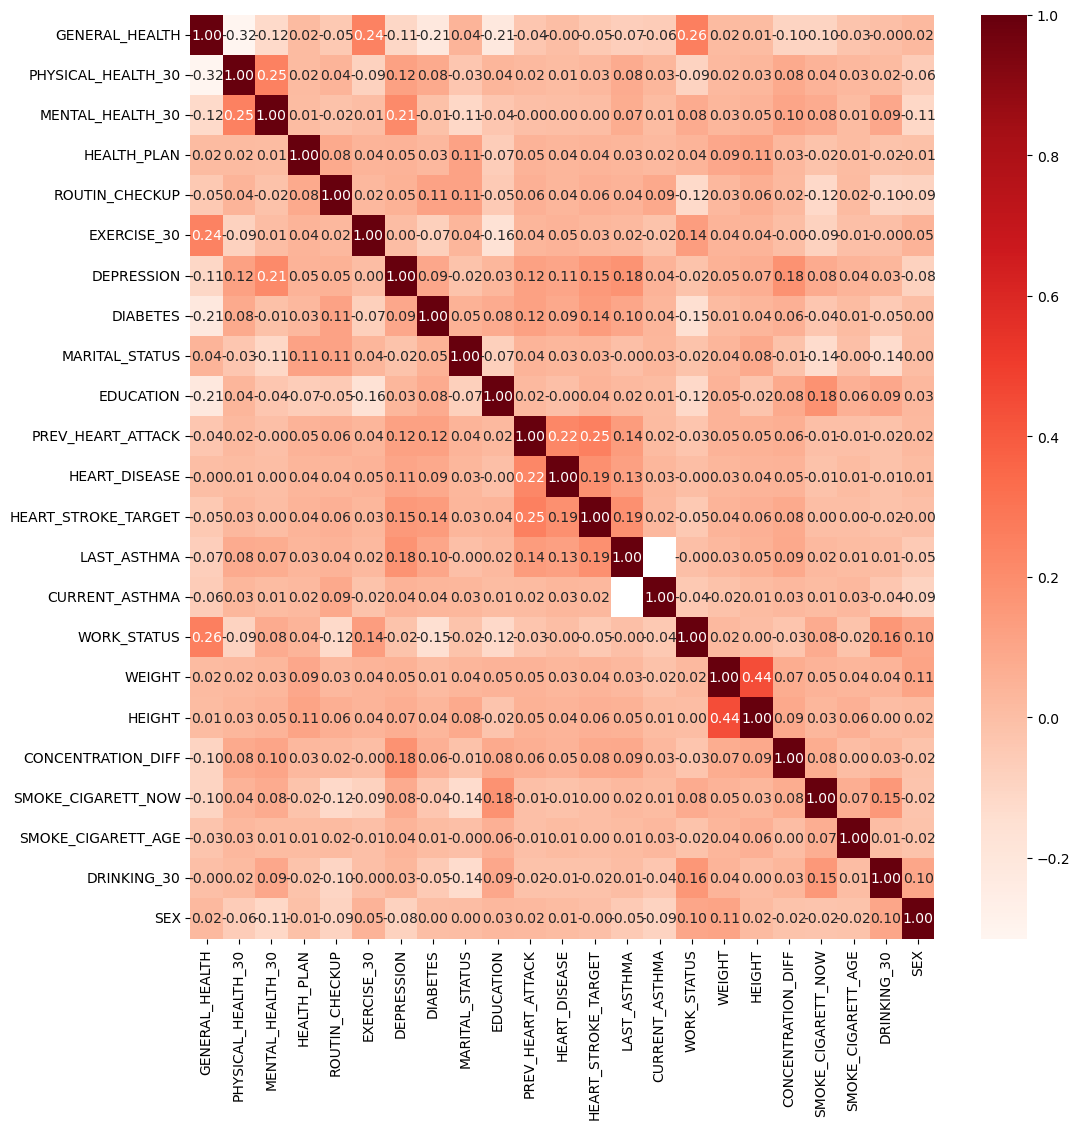

In [40]:
plt.figure(figsize=(12,12))
cor = heart_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

In [41]:
heart_df.to_csv('cdc_heart.csv')